In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#reading dataset
df = pd.read_csv("/content/drive/MyDrive/updatedDataset.csv")

In [4]:
#Encoding categorical data to numerical data
# def repl():
df['How old are you?'].replace(['Below 15','15-20', '20-30', '30-40', '40-60','Above 60'],[0,1,2,3,4,5],inplace=True)
df['What is your height (in cms)?'].replace(['Under 130 ', '130-140', '140-150', '150-160', '160-170','Above 170'],[0,1,2,3,4,5],inplace=True)
df['What is your gender?'].replace(['Female', 'Male','Prefer not to say'],[0,1,2],inplace=True)
df['Do you smoke?'].replace(['Yes', 'No'],[0,1],inplace=True)
df['Do you feel difficult to breathe after a small physical activity?  '].replace(['Yes', 'No'],[0,1],inplace=True)
df['Do you have a habit of walking after having dinner?'].replace([ 'Yes', 'No'],[0,1],inplace=True)
df['Apart from work, do you involve in any physical activity daily? (Gym, sports, etc)'].replace(['Yes', 'No'],[0,1],inplace=True)
df['Do you follow circadian rhythm ? ( with sleep cycle of 10pm - 7am ) '].replace(['Yes', 'No'],[0,1],inplace=True)
df['Do you have a regular bedtime and wake-up time?'].replace(['Yes', 'No'],[0,1],inplace=True)
df['Do you have a habit of overthinking?'].replace(['Yes', 'No'])
df['Is it possible to you to focus on one aspect without being distracted?'].replace(['Yes', 'No'],[0,1],inplace=True)
df['Are you mindful when you work?'].replace(['Yes','No'],[0,1],inplace=True)
df['How many liters of water do you intake per day?'].replace(['1-3 litres', '3-6 litres', 'Above 6 litres'],[0,1,2],inplace=True)
df['How many steps you walk per day?'].replace(['less than 5000','5000 - 10000', 'more than 10000'],[0,1,2],inplace=True)
df['How much do you weigh (in kgs)?'].replace(['Under 40', '40-50', '50-60', '60-75', 'Above 75'],[0,1,2,3,4],inplace=True)
df['What is your regular breakfast time?'].replace(['Before 8 am', '8-9 am', '9-10 am', 'After 10 am', 'Skip the breakfast'],[0,1,2,3,4],inplace=True)
df['What is your regular lunch time?'].replace(['11am -1 pm', '1-2 pm', '2-3 pm', 'After 3 pm', 'Skip the lunch'],[0,1,2,3,4],inplace=True)
df['What is your regular dinner time?'].replace(['6-7 pm', '7-8 pm', '8-10 pm', 'After 10 pm', 'Skip the dinner'],[0,1,2,3,4],inplace=True)
df['How do you rate your sleep quality?'].replace(['1', '2', '3', '4', '5'],[0,1,2,3,4],inplace=True)
df['Rate your stress levels'].replace(['1', '2', '3', '4', '5'],[0,1,2,3,4],inplace=True)
df['How often do you forget important things?'].replace(['1','2','3','4','5'],[0,1,2,3,4],inplace=True)
df['How often do you get angry?'].replace(['1','2','3','4','5'],[0,1,2,3,4],inplace=True)
df['How often do you do breathing exercises (Pranayama) / Yoga?  '].replace(['Daily', 'Weekly', '15 days', 'Never'],[0,1,2,3],inplace=True)
df['How often will you eat junk food in a week?'].replace([ 'No junk / Rarely', '2-3 times','3-5 times', 'More than 5 times / Every day'],[0,1,2,3],inplace=True)
df['How often do you include fruits and vegetables in your meals?'].replace(['more than 7 times per week',  'Daily once', 'Every alternate day', 'Never/Rarely'],[0,1,2,3],inplace=True)
df['On a regular working day, for how many hours do you sit idle without any physical activity?'].replace(['Below 1 hour','1-3 hours','3-6 hours', 'More than 6 hours'],[0,1,2,3],inplace=True)
df['How long do you sleep in a day?'].replace(['4-6 hours', '6-8 hours', '8-10 hours', 'Above 10 hours'],[0,1,2,3],inplace=True)
df['When do you go to bed at night?'].replace(['8pm - 9pm', '9pm - 10pm', '10pm - 11pm', 'After 11pm'],[0,1,2,3],inplace=True)
df['What is the average time it takes you to fall asleep?'].replace(['10-20 minutes', '20 - 40 minutes','40-60 minutes',  'More than 1 hour'],[0,1,2,3],inplace=True)


# print(df)

In [5]:
# Check for any null values in the dataset
df.isnull().any()

How old are you?                                                                               False
What is your gender?                                                                           False
How much do you weigh (in kgs)?                                                                False
What is your height (in cms)?                                                                  False
How often do you do breathing exercises (Pranayama) / Yoga?                                    False
Do you smoke?                                                                                  False
Do you feel difficult to breathe after a small physical activity?                              False
What is your regular breakfast time?                                                           False
What is your regular lunch time?                                                               False
What is your regular dinner time?                                                          

In [6]:
# Round float values and assign dependent and independent variables
df.iloc[:, -2:-1] = round(df.iloc[:, -2:-1])
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1:].values
y = np.round(y)

In [7]:
# Add a new attribute/column as Status (Binary) to determine healthy(1) or not(0)
status = [1 if i >= 3 else 0 for z in y for i in z]
status = np.reshape(status, (452, 1))
df['Status'] = status

In [8]:
# Update the assigned dependent and independent variables
x = df.iloc[:, :-1]
y = df.iloc[:, 30:32]

In [9]:
# Splitting test(25%) and train(75%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [10]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Train a Logistic Regression model with cross-validation
lr_classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000,C=0.01)
lr_scores = cross_val_score(lr_classifier, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')
lr_classifier.fit(X_train, y_train.values.ravel())

LogisticRegression(C=0.01, max_iter=1000, random_state=0)

In [12]:
# Make predictions on the test set using Logistic Regression
y_pred_lr = lr_classifier.predict(X_test)

In [13]:
# Evaluate the Logistic Regression model
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

In [14]:
# Train a Naive Bayes model
nb_classifier = GaussianNB(var_smoothing=1e-5)  # Adjust var_smoothing
nb_classifier.fit(X_train, y_train.values.ravel())


GaussianNB(var_smoothing=1e-05)

In [15]:
# Make predictions on the test set using Naive Bayes
y_pred_nb = nb_classifier.predict(X_test)

In [16]:
# Evaluate the Naive Bayes model
cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

In [17]:
# Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  # Adjust n_estimators
rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [18]:
# Make predictions on the test set using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

In [19]:
# Evaluate the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [20]:
# Create a function to plot a bar chart for evaluation metrics comparison
def plot_evaluation_metric(metric, scores_lr, scores_nb, scores_rf, model_names):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, [scores_lr, scores_nb, scores_rf], color=['blue', 'green', 'red'])
    plt.title(metric)
    plt.ylabel('Score')
    plt.show()

In [21]:
# Print and plot evaluation metrics for all models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest']

In [22]:
# Print evaluation metrics
print("Logistic Regression Metrics:")
print("Confusion Matrix:\n", cm_lr)
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

print("\nNaive Bayes Metrics:")
print("Confusion Matrix:\n", cm_nb)
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

print("\nRandom Forest Metrics:")
print("Confusion Matrix:\n", cm_rf)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Logistic Regression Metrics:
Confusion Matrix:
 [[  0   9]
 [  0 104]]
Accuracy: 0.9203539823008849
Precision: 0.9203539823008849
Recall: 1.0
F1 Score: 0.9585253456221198

Naive Bayes Metrics:
Confusion Matrix:
 [[ 7  2]
 [33 71]]
Accuracy: 0.6902654867256637
Precision: 0.9726027397260274
Recall: 0.6826923076923077
F1 Score: 0.8022598870056497

Random Forest Metrics:
Confusion Matrix:
 [[  8   1]
 [  0 104]]
Accuracy: 0.9911504424778761
Precision: 0.9904761904761905
Recall: 1.0
F1 Score: 0.9952153110047847


Accuracy Metrics:
Logistic Regression: 0.9203539823008849
Naive Bayes: 0.6902654867256637
Random Forest: 0.9911504424778761


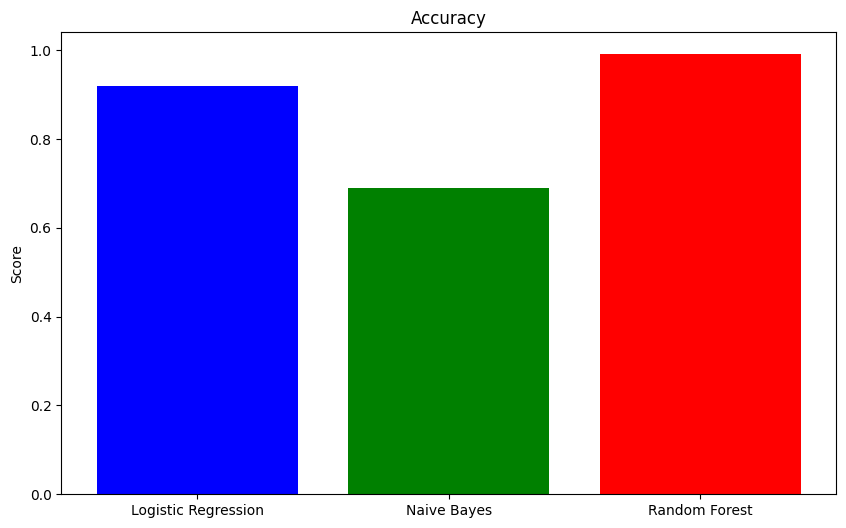

Precision Metrics:
Logistic Regression: 0.9203539823008849
Naive Bayes: 0.9726027397260274
Random Forest: 0.9904761904761905


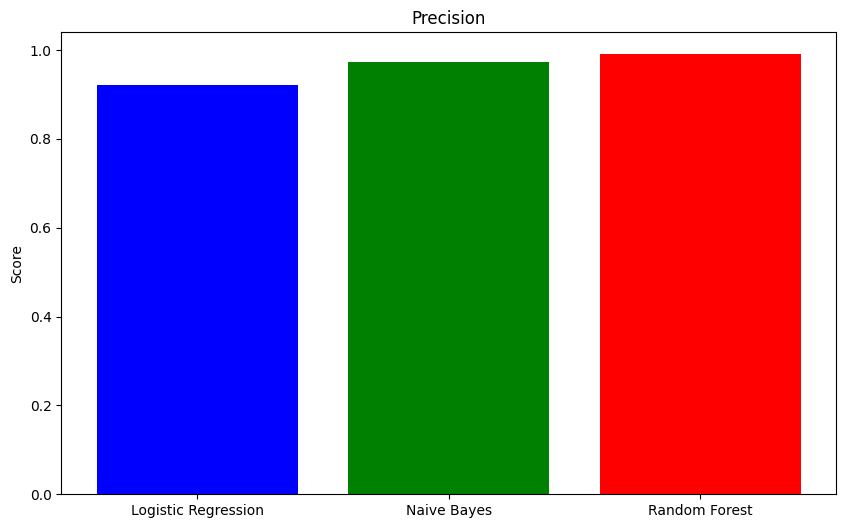

Recall Metrics:
Logistic Regression: 1.0
Naive Bayes: 0.6826923076923077
Random Forest: 1.0


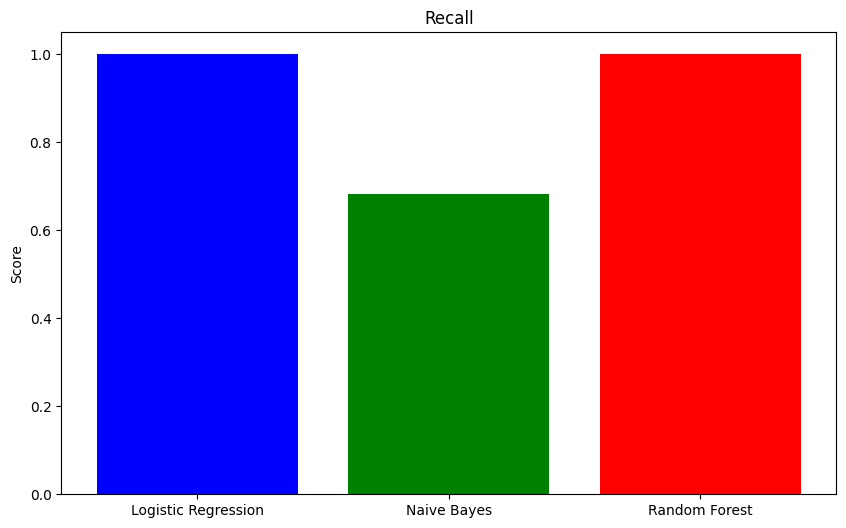

F1 Score Metrics:
Logistic Regression: 0.9585253456221198
Naive Bayes: 0.8022598870056497
Random Forest: 0.9952153110047847


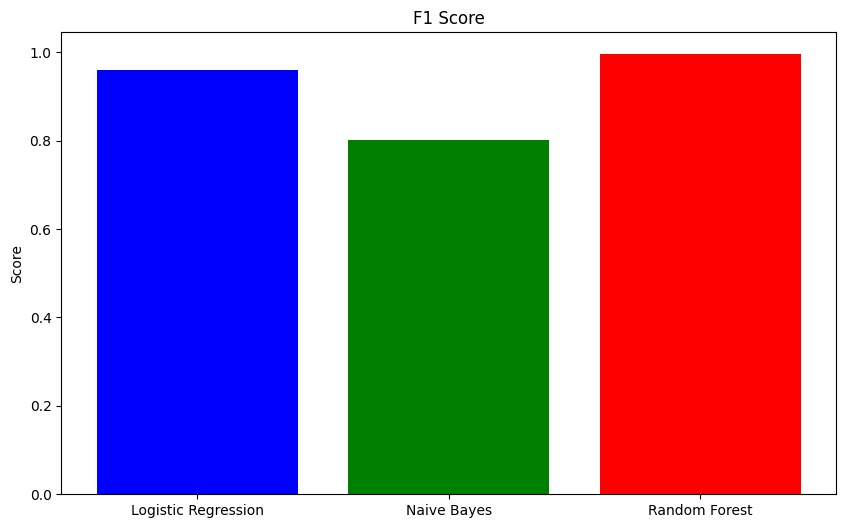

In [23]:
# Print and plot evaluation metrics for each metric
for metric in metrics:
    if metric == 'Accuracy':
        scores_lr = accuracy_lr
        scores_nb = accuracy_nb
        scores_rf = accuracy_rf
    elif metric == 'Precision':
        scores_lr = precision_lr
        scores_nb = precision_nb
        scores_rf = precision_rf
    elif metric == 'Recall':
        scores_lr = recall_lr
        scores_nb = recall_nb
        scores_rf = recall_rf
    elif metric == 'F1 Score':
        scores_lr = f1_lr
        scores_nb = f1_nb
        scores_rf = f1_rf

    print(f"{metric} Metrics:")
    print("Logistic Regression:", scores_lr)
    print("Naive Bayes:", scores_nb)
    print("Random Forest:", scores_rf)

    # Plot evaluation metrics comparison for the current metric
    plot_evaluation_metric(metric, scores_lr, scores_nb, scores_rf, model_names)

In [24]:
# Plot evaluation metrics comparison
# plot_evaluation_metrics(metrics, scores_lr, scores_nb, scores_rf, model_names)

In [25]:
# Plot the decision tree for Logistic Regression
# plot_lr_tree(lr_classifier)